#### IMPORTING LIBRARIES

In [935]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
# warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

#### READING & UNDERSTANDING DATA

In [936]:
df = pd.read_csv("train.csv")

In [937]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [938]:
df.shape

(1460, 81)

In [939]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [940]:
# Checking Null values percentage
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)/len(df)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

#### IMPUTING MISSING VALUES

1. PoolQC

In [941]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

From the Data Dictionary we can see that the NA value can be replaced by "No Pool"

In [942]:
df.PoolQC = df.PoolQC.fillna("No Pool")

2. MiscFeatures

In [943]:
df.MiscFeature = df.MiscFeature.fillna("None")

3. Alley

In [944]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [945]:
df.Alley = df.MiscFeature.fillna("No Alley")

4. Fence

In [946]:
df.Fence = df.Fence.fillna('No Fence')

5. FirePlaceQu

In [947]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [948]:
df.FireplaceQu = df.FireplaceQu.fillna('No Fireplace')

6. LotFrontage

In [949]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [950]:
# We can replace the null values with medians

In [951]:
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

In [952]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)/len(df)*100

GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageYrBlt     5.547945
GarageType      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [953]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

7. GarageCond, GarageQual, GarageFinish, GarageType, GarageYrBlt

In [954]:
df[['GarageCond','GarageQual','GarageFinish','GarageType']] = df[['GarageCond','GarageQual','GarageFinish','GarageType']].fillna("No Garage")
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

8. BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual

In [955]:
df[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']] = df[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']].fillna("No Basement")


9. MasVnrArea, MasVnrType

In [956]:
df.MasVnrArea = df.MasVnrArea.fillna(0)
df.MasVnrType = df.MasVnrType.fillna("None")

10. Electrical

In [957]:
df.Electrical = df.Electrical.fillna('None')

In [958]:
## Checking Null Values now
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)/len(df)*100

Series([], dtype: float64)

In [959]:
df.dropna(inplace=True)

In [960]:
df.shape

(1460, 81)

Coverting categorical values

In [961]:
df.MSSubClass = df.MSSubClass.astype('object')
df.OverallCond = df.OverallCond.astype('object')
df.OverallQual = df.OverallQual.astype('object')

#### DATA VISUALIZATION

In [962]:
# Dependent variable SalePrice

/Users/thepunisher/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

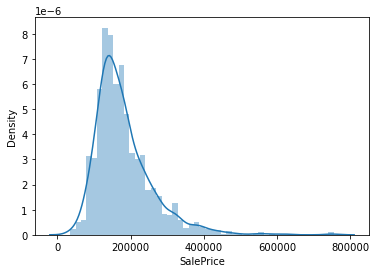

In [963]:
sns.distplot(df.SalePrice)

SalePrice looks skewed & hence we can transform it

/Users/thepunisher/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

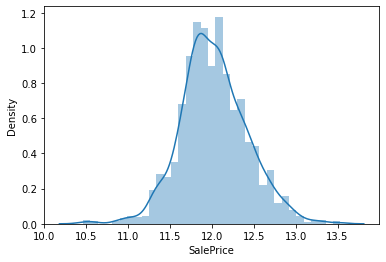

In [964]:
df.SalePrice = np.log(df.SalePrice)
sns.distplot(df.SalePrice)

In [965]:
## Numerical variables using pairplot

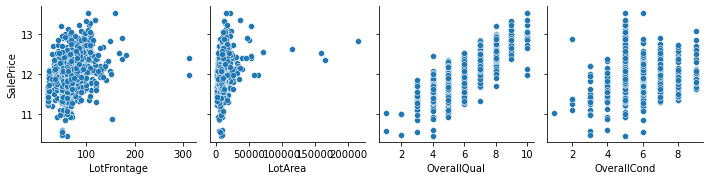

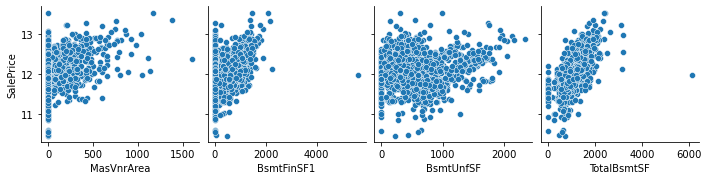

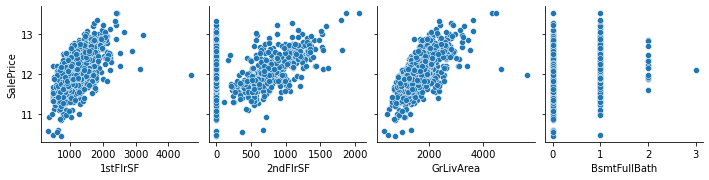

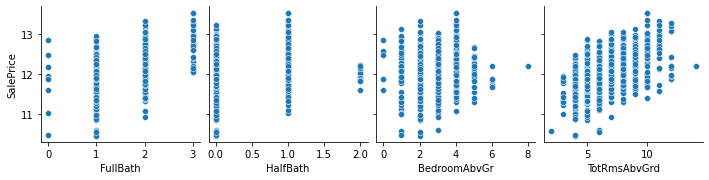

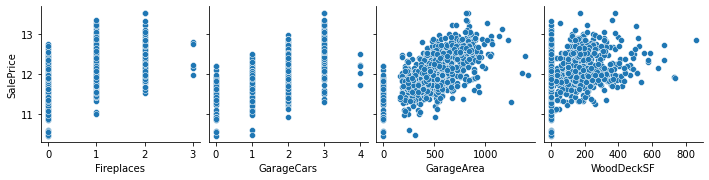

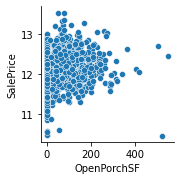

In [966]:

sns.pairplot(df,x_vars=['LotFrontage','LotArea','OverallQual','OverallCond',], 
                         y_vars='SalePrice',kind='scatter',diag_kind = None)
sns.pairplot(df,x_vars=['MasVnrArea','BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF',], 
                         y_vars='SalePrice',kind='scatter',diag_kind = None)
sns.pairplot(df,x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea','BsmtFullBath'], 
                         y_vars='SalePrice',kind='scatter',diag_kind = None)
sns.pairplot(df,x_vars=['FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd'], 
                         y_vars='SalePrice',kind='scatter',diag_kind = None)
sns.pairplot(df,x_vars=['Fireplaces','GarageCars','GarageArea', 'WoodDeckSF'], 
                         y_vars='SalePrice',kind='scatter',diag_kind = None)
sns.pairplot(df,x_vars=['OpenPorchSF'], y_vars='SalePrice',kind='scatter',diag_kind = None)

In [967]:
## Correaltion Heatmap

<AxesSubplot:>

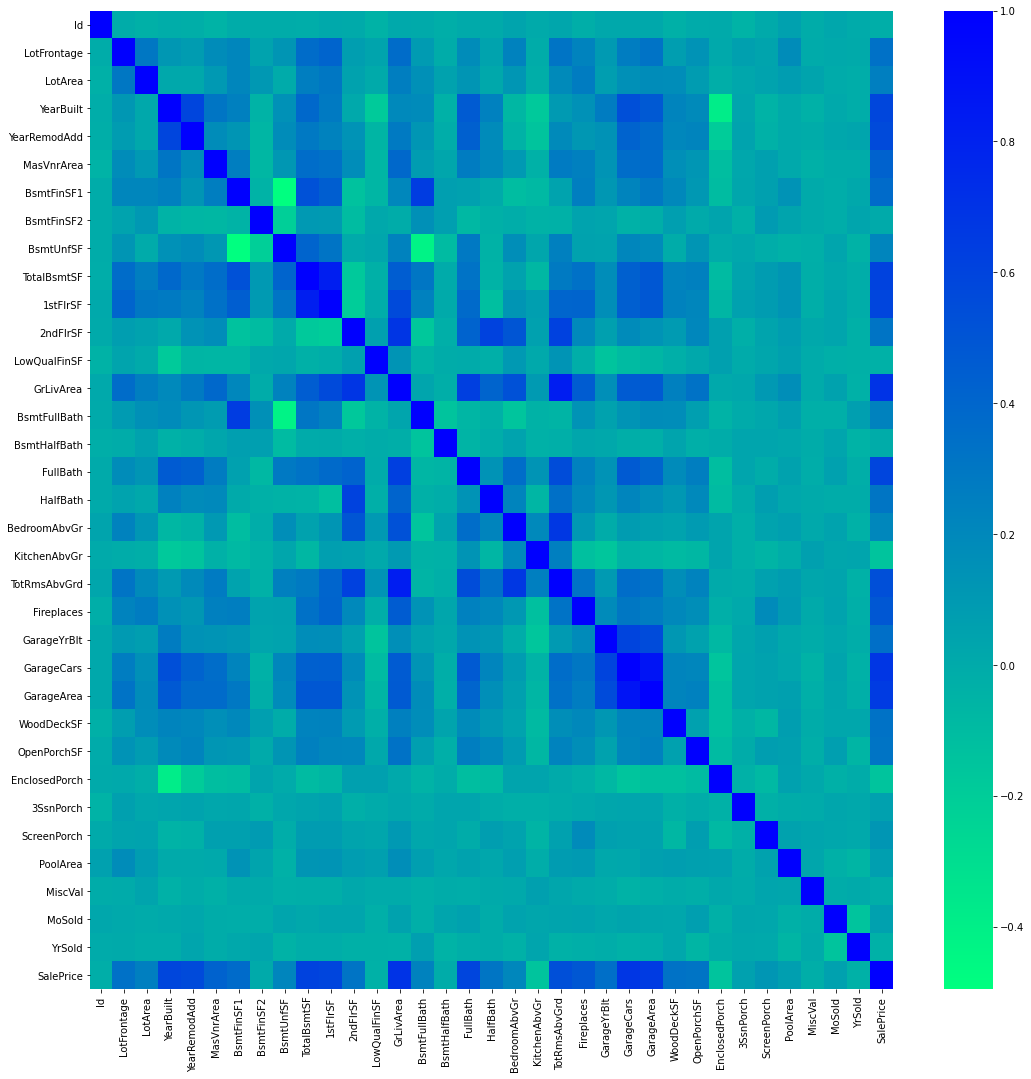

In [968]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),cmap='winter_r')

#### DATA PREPROCESSING

In [969]:
# Checking duplicates
df.duplicated().value_counts()

False    1460
dtype: int64

No Duplicate Values

In [970]:
## Creating Dummy vairables

In [971]:
df1=pd.get_dummies(data=df,drop_first=True)

In [972]:
df1.shape

(1460, 292)

In [973]:
df1.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Othr,Alley_Shed,Alley_TenC,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Gar

In [974]:
## Dropping ID
df1 = df1.drop('Id',axis=1)

#### Train Test Split

In [975]:
y = df1.pop('SalePrice')
X = df1

In [976]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

#### Scaling

In [977]:
scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

#### MODELLING

### RIDGE

In [978]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 100, 500, 1000 ]}

ridge = Ridge()


folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [979]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
16,0.005118,0.000183,0.001910,0.000086,5,{'alpha': 5.0},-0.110235,-0.093622,-0.096208,-0.104503,-0.081618,-0.097237,0.009796,1,-0.068746,-0.076110,-0.075121,-0.076252,-0.079696,-0.075185,0.003572
17,0.005146,0.000316,0.001993,0.000224,6,{'alpha': 6.0},-0.110335,-0.093505,-0.096253,-0.104571,-0.081795,-0.097292,0.009785,2,-0.069983,-0.077131,-0.076332,-0.077181,-0.080582,-0.076242,0.003455
15,0.005397,0.000282,0.002086,0.000213,4,{'alpha': 4.0},-0.110177,-0.093987,-0.096530,-0.104478,-0.081472,-0.097329,0.009792,3,-0.067395,-0.074971,-0.073796,-0.075379,-0.078791,-0.074066,0.003727
18,0.005015,0.000242,0.001982,0.000185,7,{'alpha': 7.0},-0.110489,-0.093512,-0.096510,-0.104601,-0.082107,-0.097444,0.009726,4,-0.071121,-0.078106,-0.077462,-0.078084,-0.081414,-0.077237,0.003358
19,0.005222,0.000302,0.002112,0.000413,8,{'alpha': 8.0},-0.110684,-0.093543,-0.096875,-0.104672,-0.082560,-0.097667,0.009637,5,-0.072175,-0.079005,-0.078513,-0.078962,-0.082235,-0.078178,0.003283
14,0.005195,0.000123,0.002030,0.000124,3,{'alpha': 3.0},-0.110433,-0.094858,-0.097765,-0.104467,-0.081343,-0.097773,0.009834,6,-0.065872,-0.073700,-0.072250,-0.074440,-0.077758,-0.072804,0.003909
20,0.005731,0.000781,0.001995,0.000195,9,{'alpha': 9.0},-0.110980,-0.093592,-0.097394,-0.104887,-0.083033,-0.097977,0.009589,7,-0.073182,-0.079872,-0.079494,-0.079807,-0.083106,-0.079092,0.003235
21,0.005081,0.000531,0.002047,0.000328,10,{'alpha': 10.0},-0.111290,-0.093682,-0.097905,-0.105220,-0.083517,-0.098323,0.009556,8,-0.074157,-0.080731,-0.080424,-0.080641,-0.083947,-0.079980,0.003189
13,0.005623,0.000363,0.002091,0.000200,2,{'alpha': 2.0},-0.110904,-0.096178,-0.100226,-0.104250,-0.081232,-0.098558,0.009934,9,-0.064010,-0.072070,-0.070294,-0.073362,-0.076452,-0.071238,0.004136
12,0.005994,0.001324,0.002383,0.000663,1,{'alpha': 1.0},-0.111223,-0.097752,-0.104873,-0.103664,-0.080887,-0.099680,0.010324,10,-0.060996,-0.069488,-0.067195,-0.071566,-0.074621,-0.068773,0.004593


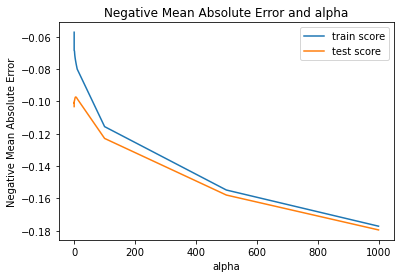

In [980]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [981]:
# Best lambda value
ridge_model_cv.best_params_

{'alpha': 5.0}

In [982]:
# Fiting with best lambda

alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.62295558e-02,  8.47028665e-02,  4.79628109e-02,  7.16828129e-02,
        2.02284711e-02,  4.56112650e-02,  5.35651073e-02,  4.35944287e-02,
        7.17220185e-02,  1.77409253e-01,  1.56056457e-01,  4.21807578e-02,
        2.05240129e-01,  9.98424859e-02,  9.47157964e-03,  1.73143283e-01,
        8.16863408e-02,  1.17073144e-01, -6.75315541e-02,  1.78277225e-01,
        7.14541495e-02,  6.53579205e-03,  1.58689274e-01,  1.10366590e-01,
        8.93791885e-02,  5.85753183e-02,  7.33050048e-02,  3.08725165e-02,
        8.10986667e-02, -8.44913366e-03,  7.48035777e-03,  1.16882265e-02,
       -2.20985799e-02, -7.94296077e-02,  8.67987272e-03, -1.32414263e-02,
        2.01683621e-03, -2.39736832e-02,  4.93975488e-02,  6.36030418e-02,
        2.50596809e-03,  1.21941163e-03, -2.42303042e-03, -3.08612570e-02,
       -6.74221045e-02, -2.99739162e-02,  3.10751575e-03,  9.51276867e-02,
        1.00365989e-01,  9.14535083e-02,  4.86287695e-02, -1.24782118e-02,
        1.01567666e-02, -

In [983]:
# Train r2 score
y_train_pred =ridge.predict(X_train)
r2_score(y_pred=y_train_pred,y_true=y_train)

0.9225591498683814

In [984]:
# Test r2 score
y_test_pred =ridge.predict(X_test)
r2_score(y_pred=y_test_pred,y_true=y_test)

0.8882847295284781

In [985]:
# Mean squared error
mean_squared_error(y_pred=y_test_pred,y_true=y_test)

0.018723446357036093

In [986]:
ridge_params_df = pd.DataFrame({'Params':X_train.columns, 'Coef':list(ridge.coef_)})
ridge_params_df = ridge_params_df.loc[ridge_params_df['Coef'] != 0]
ridge_params_df.sort_values('Coef',ascending=False)

,Params,Coef
12,GrLivArea,0.205240
19,TotRmsAbvGrd,0.178277
9,1stFlrSF,0.177409
15,FullBath,0.173143
22,GarageCars,0.158689
10,2ndFlrSF,0.156056
126,OverallQual_9,0.149893
90,Neighborhood_StoneBr,0.136665
125,OverallQual_8,0.123042
147,RoofMatl_WdShngl,0.118199


**FOR RIDGE:**
- Train r-squared = 0.9225
- Test r-squared = 0.8882
- Mean squared error = 0.0187

### LASSO

In [987]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 100, 500, 1000 ]}

lasso = Lasso()


folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [988]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=1000]
lasso_cv_results.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.012297,0.002874,0.001872,0.000022,0.001,{'alpha': 0.001},-0.112795,-0.097469,-0.092989,-0.103042,-0.078083,-0.096875,0.011490,1,-0.075676,-0.084599,-0.082421,-0.085274,-0.087818,-0.083158,0.004118
0,0.065216,0.007818,0.002499,0.000469,0.0001,{'alpha': 0.0001},-0.112106,-0.096187,-0.105714,-0.097430,-0.077037,-0.097695,0.011841,2,-0.057741,-0.067530,-0.062796,-0.068421,-0.071498,-0.065597,0.004819
2,0.004649,0.000135,0.001839,0.000019,0.01,{'alpha': 0.01},-0.157044,-0.146410,-0.149861,-0.149333,-0.140333,-0.148596,0.005414,3,-0.142493,-0.146452,-0.146630,-0.145767,-0.145709,-0.145410,0.001503
3,0.002992,0.000044,0.001865,0.000053,0.1,{'alpha': 0.1},-0.328131,-0.284735,-0.284835,-0.269458,-0.285519,-0.290535,0.019743,4,-0.289195,-0.291298,-0.289662,-0.291183,-0.290079,-0.290283,0.000831
22,0.003036,0.000161,0.002409,0.000684,100,{'alpha': 100},-0.339751,-0.303406,-0.304198,-0.288320,-0.303868,-0.307909,0.017018,5,-0.300035,-0.308762,-0.308828,-0.312453,-0.309043,-0.307824,0.004134
21,0.003024,0.000210,0.001816,0.000023,10,{'alpha': 10.0},-0.339751,-0.303406,-0.304198,-0.288320,-0.303868,-0.307909,0.017018,5,-0.300035,-0.308762,-0.308828,-0.312453,-0.309043,-0.307824,0.004134
20,0.002961,0.000070,0.001836,0.000036,9,{'alpha': 9.0},-0.339751,-0.303406,-0.304198,-0.288320,-0.303868,-0.307909,0.017018,5,-0.300035,-0.308762,-0.308828,-0.312453,-0.309043,-0.307824,0.004134
19,0.002917,0.000072,0.001835,0.000032,8,{'alpha': 8.0},-0.339751,-0.303406,-0.304198,-0.288320,-0.303868,-0.307909,0.017018,5,-0.300035,-0.308762,-0.308828,-0.312453,-0.309043,-0.307824,0.004134
18,0.003015,0.000135,0.001968,0.000247,7,{'alpha': 7.0},-0.339751,-0.303406,-0.304198,-0.288320,-0.303868,-0.307909,0.017018,5,-0.300035,-0.308762,-0.308828,-0.312453,-0.309043,-0.307824,0.004134
17,0.003176,0.000515,0.002088,0.000530,6,{'alpha': 6.0},-0.339751,-0.303406,-0.304198,-0.288320,-0.303868,-0.307909,0.017018,5,-0.300035,-0.308762,-0.308828,-0.312453,-0.309043,-0.307824,0.004134


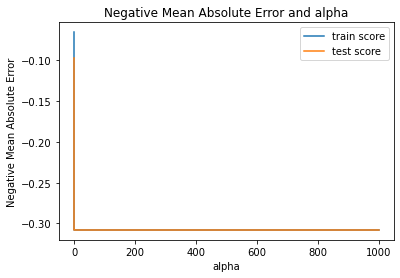

In [989]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [990]:
# Best lambda value
lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [991]:
# Fiting with best lambda

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.35895929e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.55724301e-01,  8.62010654e-02,  0.00000000e+00,  1.53512475e-01,
        4.73428558e-02,  0.00000000e+00, -3.58854471e-02,  1.73534813e-01,
        2.03670616e-02,  0.00000000e+00,  2.68749333e-01,  2.53714665e-02,
        6.98211819e-02,  2.54202188e-02,  0.00000000e+00,  0.00000000e+00,
        5.86536110e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -6.56479434e-03, -8.36936785e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.05607743e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.76257919e-02, -0.00000000e+00, -0.00000000e+00,  2.50109763e-02,
        0.00000000e+00,  4.57037129e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [992]:
# Train r2 score
y_train_pred =lasso.predict(X_train)
r2_score(y_pred=y_train_pred,y_true=y_train)

0.9002224344870241

In [993]:
# Test r2 score
y_test_pred =lasso.predict(X_test)
r2_score(y_pred=y_test_pred,y_true=y_test)

0.8929217758468969

In [994]:
# Mean squared error
mean_squared_error(y_pred=y_test_pred,y_true=y_test)

0.017946278762744333

**FOR LASSO:**
- Train r-squared = 0.9002
- Test r-squared = 0.8929
- Mean squared error = 0.01794

Hence, Lasso has slightly less mean squared error

In [995]:
# Parameters having greater coefficients
lasso_params_df = pd.DataFrame({'Params':X_train.columns, 'Coef':list(lasso.coef_)})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df.sort_values('Coef',ascending=False)

,Params,Coef
12,GrLivArea,8.557243e-01
22,GarageCars,2.687493e-01
126,OverallQual_9,1.849468e-01
19,TotRmsAbvGrd,1.735348e-01
15,FullBath,1.535125e-01
125,OverallQual_8,1.211957e-01
84,Neighborhood_NridgHt,1.195077e-01
74,Neighborhood_Crawfor,1.125824e-01
90,Neighborhood_StoneBr,1.037443e-01
225,CentralAir_Y,9.537577e-02


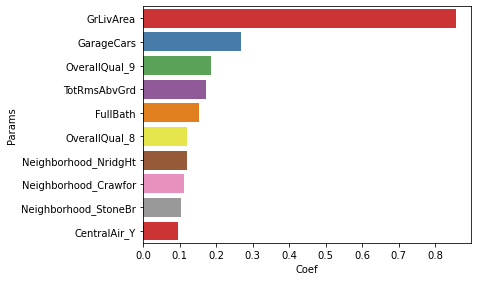

In [996]:
df_final = pd.DataFrame(lasso_params_df.sort_values('Coef',ascending=False)).head(10)


plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Params', x='Coef', palette='Set1', data = df_final)
plt.show()

### CONCLUSIONS-

- **Optimal Lambda value**
-- Ridge: 5.0
-- Lasso: 0.001
- **Test R2 Score**
-- Ridge: 0.8882
-- Lasso: 0.8929
- **Mean squared error**
-- Ridge: 0.0187
-- Lasso: 0.0179
- **Lasso has slightly less mean squared error than Ridge and hence better for price prediction.**
- **Above grade (ground) living area square feet, Size of garage in car capacity, Overall Quality, Total rooms above grade, Full bathrooms above grade are the better predictors of the sale price.**

### SUBJECTIVE QUESTION

In [997]:
# Doubling the alpha for the subjective question

In [998]:
# RIDGE
alpha = 10.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.93572446e-03,  5.70669330e-02,  3.62837223e-02,  8.09159228e-02,
        2.77179409e-02,  4.22504138e-02,  4.02541954e-02,  4.91870397e-02,
        6.75445081e-02,  1.39819150e-01,  1.31910471e-01,  3.39179054e-02,
        1.64971609e-01,  8.51949237e-02,  5.02824445e-03,  1.60248354e-01,
        7.43222257e-02,  1.02801327e-01, -3.86596253e-02,  1.66611986e-01,
        6.65312801e-02,  1.21215731e-02,  1.43688821e-01,  1.07934378e-01,
        8.08208573e-02,  5.54221071e-02,  5.58530391e-02,  1.99195139e-02,
        6.60029945e-02, -9.63414451e-03,  1.79008628e-03,  1.10873834e-02,
       -2.15310710e-02, -8.29213780e-02,  4.33022730e-03, -5.79273164e-03,
        2.25948934e-03, -1.74954376e-02,  5.17944901e-02,  5.48121215e-02,
       -4.65199921e-04, -2.25493904e-03,  2.68450866e-03, -2.90407417e-02,
       -6.21016907e-02, -2.68621187e-02,  6.35126774e-04,  6.03178137e-02,
        6.21228436e-02,  6.59364970e-02,  8.58391678e-03, -4.57573852e-04,
        9.63795413e-03, -

In [999]:
# Train r2 score
y_train_pred =ridge.predict(X_train)
r2_score(y_pred=y_train_pred,y_true=y_train)

0.9137327121819174

In [1000]:
# Test r2 score
y_test_pred =ridge.predict(X_test)
r2_score(y_pred=y_test_pred,y_true=y_test)

0.8878302752597428

In [1001]:
# Mean squared error
mean_squared_error(y_pred=y_test_pred,y_true=y_test)

0.01879961275833897

In [1002]:
ridge_params_df = pd.DataFrame({'Params':X_train.columns, 'Coef':list(ridge.coef_)})
ridge_params_df = ridge_params_df.loc[ridge_params_df['Coef'] != 0]
ridge_params_df.sort_values('Coef',ascending=False)

,Params,Coef
19,TotRmsAbvGrd,0.166612
12,GrLivArea,0.164972
15,FullBath,0.160248
22,GarageCars,0.143689
9,1stFlrSF,0.139819
126,OverallQual_9,0.131961
10,2ndFlrSF,0.131910
125,OverallQual_8,0.109996
90,Neighborhood_StoneBr,0.109234
23,GarageArea,0.107934


In [1003]:
# Lasso
alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.12982217e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.07869153e-01,  4.72735760e-02,  0.00000000e+00,  1.16514043e-01,
        1.95515661e-02,  0.00000000e+00, -0.00000000e+00,  1.57133602e-01,
        0.00000000e+00,  0.00000000e+00,  2.91169795e-01,  3.60754811e-02,
        4.49460731e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.32172478e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -6.97376127e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -3.03623465e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.16314726e-02, -4.28169867e-02,  0.00000000e+00,
        0.00000000e+00, -

In [1004]:
# Train r2 score
y_train_pred =lasso.predict(X_train)
r2_score(y_pred=y_train_pred,y_true=y_train)

0.8764067380957388

In [1005]:
# Test r2 score
y_test_pred =lasso.predict(X_test)
r2_score(y_pred=y_test_pred,y_true=y_test)

0.8728603126866572

In [1006]:
# Mean squared error
mean_squared_error(y_pred=y_test_pred,y_true=y_test)

0.021308574067038986

In [1007]:
lasso_params_df = pd.DataFrame({'Params':X_train.columns, 'Coef':list(lasso.coef_)})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df.sort_values('Coef',ascending=False)

,Params,Coef
12,GrLivArea,0.807869
22,GarageCars,0.291170
126,OverallQual_9,0.170878
19,TotRmsAbvGrd,0.157134
15,FullBath,0.116514
125,OverallQual_8,0.115138
3,YearRemodAdd,0.112982
225,CentralAir_Y,0.103781
84,Neighborhood_NridgHt,0.088607
74,Neighborhood_Crawfor,0.087496


In [1008]:
### REMOVING 5 TOP SIGNIFICANT VARIABLES & RUNNING THE WHOLE SCRIPT

In [1009]:
X = X.drop(['GrLivArea','GarageCars','OverallQual_9','TotRmsAbvGrd','FullBath'],axis=1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished


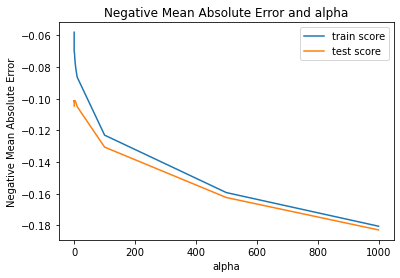

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


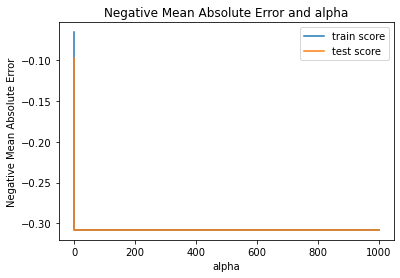

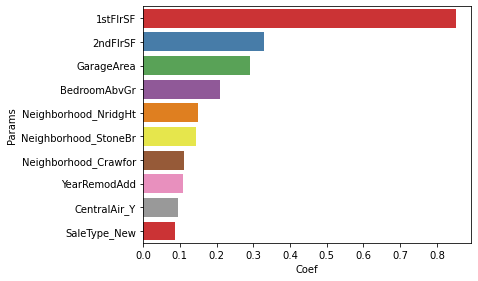

In [1010]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

#### Scaling

scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

#### MODELLING

### RIDGE

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 100, 500, 1000 ]}

ridge = Ridge()


folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results.sort_values(by = ['rank_test_score'])

# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

# Best lambda value
ridge_model_cv.best_params_

# Fiting with best lambda

alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

# Train r2 score
y_train_pred =ridge.predict(X_train)
r2_score(y_pred=y_train_pred,y_true=y_train)

# Test r2 score
y_test_pred =ridge.predict(X_test)
r2_score(y_pred=y_test_pred,y_true=y_test)

# Mean squared error
mean_squared_error(y_pred=y_test_pred,y_true=y_test)

ridge_params_df = pd.DataFrame({'Params':X_train.columns, 'Coef':list(ridge.coef_)})
ridge_params_df = ridge_params_df.loc[ridge_params_df['Coef'] != 0]
ridge_params_df.sort_values('Coef',ascending=False)




### LASSO

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 100, 500, 1000 ]}

lasso = Lasso()


folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=1000]
lasso_cv_results.sort_values(by = ['rank_test_score'])

# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

# Best lambda value
lasso_model_cv.best_estimator_

# Fiting with best lambda

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

# Train r2 score
y_train_pred =lasso.predict(X_train)
r2_score(y_pred=y_train_pred,y_true=y_train)

# Test r2 score
y_test_pred =lasso.predict(X_test)
r2_score(y_pred=y_test_pred,y_true=y_test)

# Mean squared error
mean_squared_error(y_pred=y_test_pred,y_true=y_test)



# Parameters having greater coefficients
lasso_params_df = pd.DataFrame({'Params':X_train.columns, 'Coef':list(lasso.coef_)})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df.sort_values('Coef',ascending=False)

df_final = pd.DataFrame(lasso_params_df.sort_values('Coef',ascending=False)).head(10)


plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Params', x='Coef', palette='Set1', data = df_final)
plt.show()